In [300]:
import numpy as np # for linear algebra
import pandas as pd # for data processing

In [301]:
import matplotlib.pyplot as plt # for graphs
%matplotlib inline
import seaborn as sns # for graphs

In [302]:
# first things first, let's read the file 
df = pd.read_csv(r'C:\Users\Admin\Documents\Data\Data\datasets_IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [303]:
df.info()
# there are 150 rows and no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


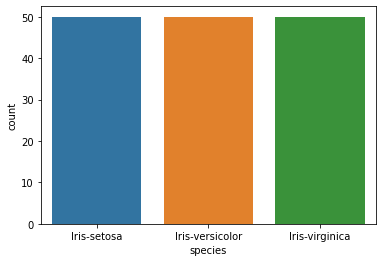

In [304]:
sns.countplot(x='species',data=df)
# target classes are well balanced

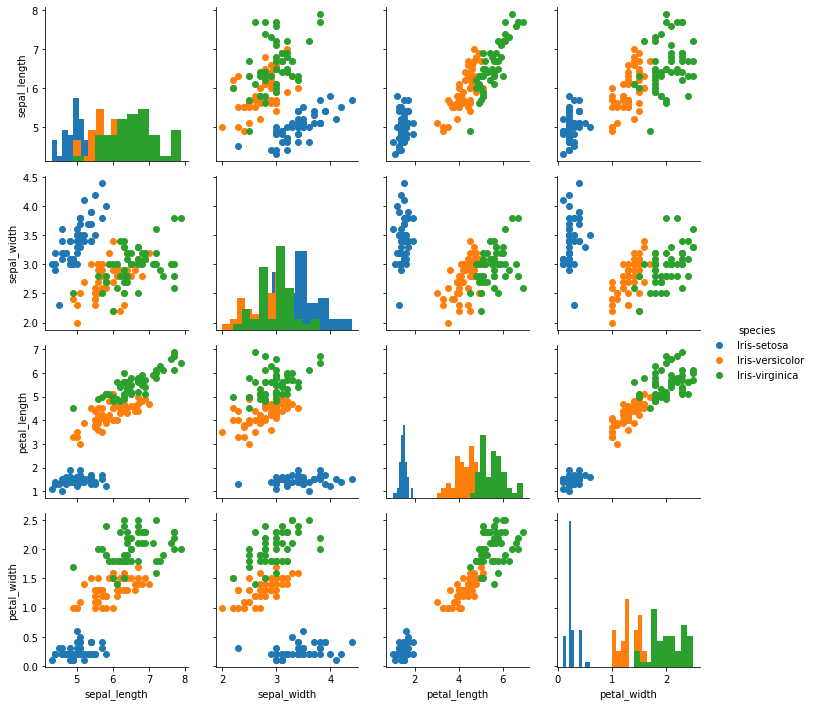

In [305]:
g = sns.PairGrid(data=df,hue='species')
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)
g.map_diag(plt.hist)
g = g.add_legend()

# I can see that there is a noticeable difference between setosa and the other two. Especially it's petal length and 
# petal width is considerably lower compared to versicolor and virginica.

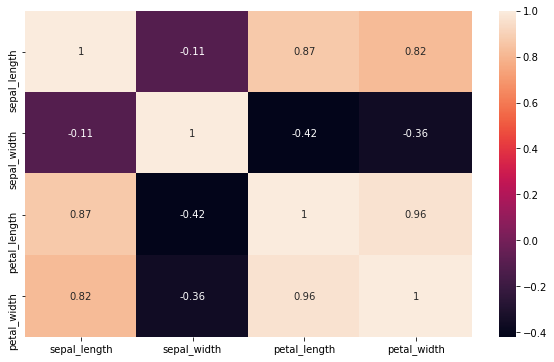

In [306]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
# when I look at both pairgrid and heatmap, I can see that there is a strong, positive and linear relationship between
# 1 - sepal length&petal width
# 2- sepal length&petal length
# 3- petal length&petal width
# considering versicolor and verginica.

In [307]:
df[df['species'] == 'Iris-setosa'].mean()

sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64

In [308]:
df[df['species'] == 'Iris-versicolor'].mean()

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [309]:
df[df['species'] == 'Iris-virginica'].mean()
# Again it can be seen that petal length and petal width of setosa is much more lower that the other two. 

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64

## train-test split

In [310]:
from sklearn.model_selection import train_test_split

In [311]:
X = df.drop('species',axis=1)
y = df['species']

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## scaling

In [313]:
from sklearn.preprocessing import StandardScaler

In [314]:
scaler = StandardScaler()

In [315]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## logistic regression model

In [316]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [317]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge

In [318]:
logmodel = LogisticRegression()
logmodel_cv = GridSearchCV(logmodel, grid, cv=10)
logmodel_cv.fit(scaled_X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [319]:
logmodel_cv.best_params_ # best parameters

{'C': 10.0, 'penalty': 'l2'}

In [320]:
logmodel_cv.best_score_ # accuracy

0.9666666666666666

In [321]:
pred = logmodel_cv.predict(scaled_X_test)

In [322]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [323]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



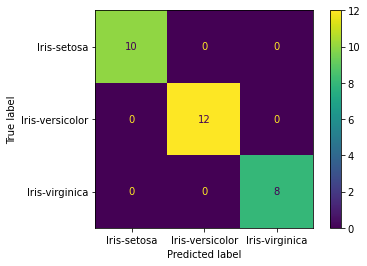

In [324]:
plot_confusion_matrix(logmodel_cv, scaled_X_test, y_test) 
# In classification report it seems like there's sth wrong with model but when I looked at confusion matrix, I see that 
# a perfect prediction has been done by model.